In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename ='Joey_food.wav'

In [3]:
#pip install librosa

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
import matplotlib

In [6]:
print(matplotlib.__version__)

3.6.3


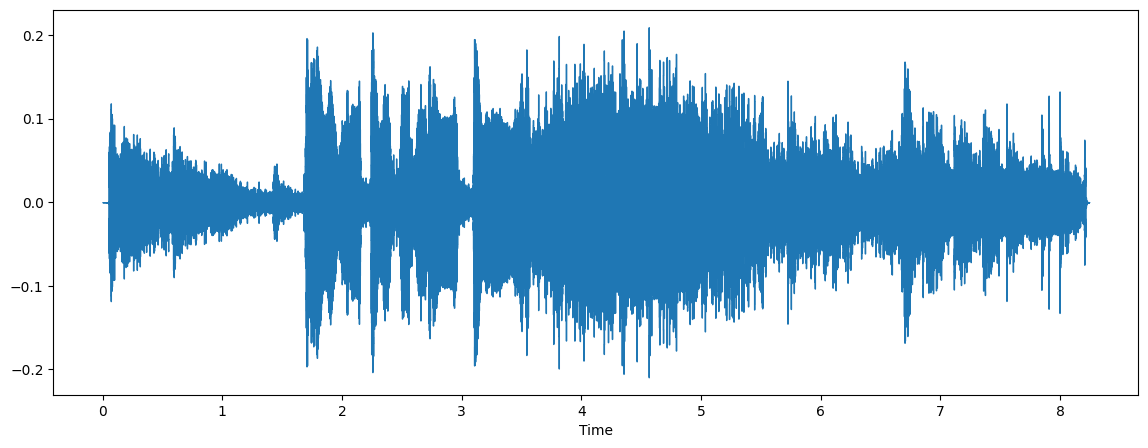

In [7]:

#example to check
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr = sample_rate)
ipd.Audio(filename)

Sample rates are usually measured per second, using kilohertz (kHz) or cycles per second.

In [8]:
sample_rate

22050

In [9]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.7804445e-05,
       9.8334735e-05, 0.0000000e+00], dtype=float32)

In [10]:
from scipy.io import wavfile as wav
wav_sample_rate, scipy_audio = wav.read(filename)

In [11]:
wav_sample_rate

48000

In [12]:
scipy_audio

array([0, 0, 0, ..., 3, 3, 2], dtype=int16)

In [13]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


Checking whether the dataset is imbalanced

In [14]:
metadata = metadata.loc[metadata['class'].isin(['children_playing', 'dog_bark'])]

In [15]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
Name: class, dtype: int64

Data Preprocessing



In [16]:
audio_file_path = '100263-2-0-3.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data) #normalised b/w -1 to +1

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


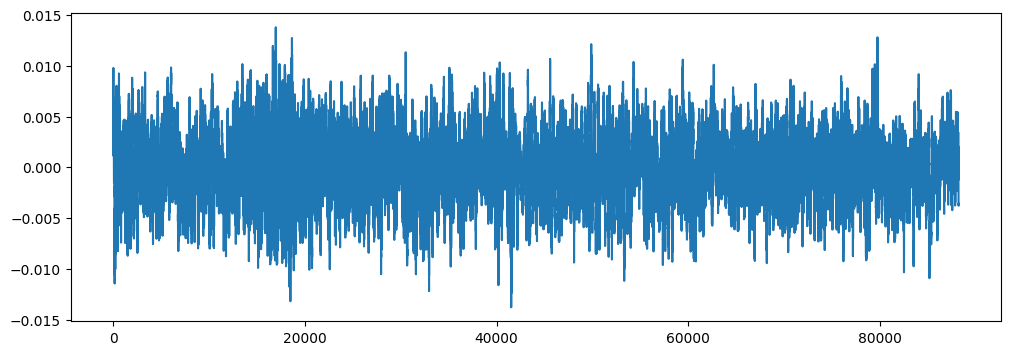

In [18]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation Here Librosa converts the signal to mono, meaning the channel will always be 1

In [19]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [20]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

In [21]:
wave_sample_rate

44100

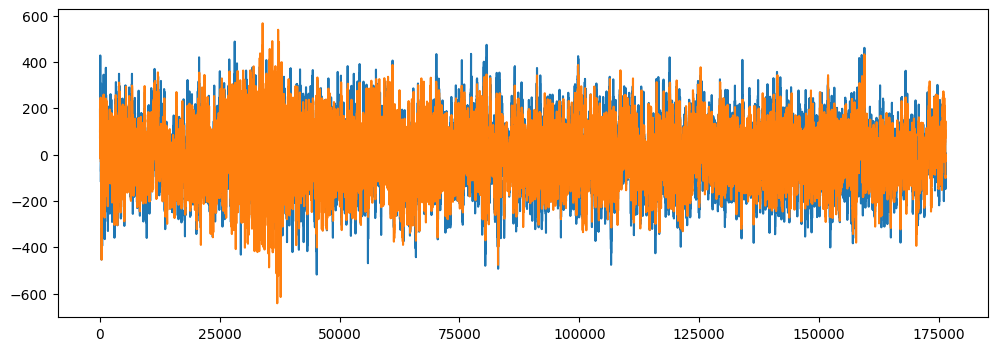

In [22]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extracting Features

Using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [23]:
#for single data
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [24]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259779e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760443e+00, -3.2479753e+00, -4.8965535e+00, ...,
        -5.2023673e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968416e-01, -5.8838761e-01, -8.1724107e-01, ...,
         1.8340671e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780630e+00,  6.9809496e-01,  6.3521605e+00, ...,
        -2.6221929e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

In [25]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa
import numpy as np

audio_dataset_path='UrbanSound8K/audio/'
# metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8712,99500-2-0-23.wav,99500,11.5,15.500000,2,9,2,children_playing
8713,99500-2-0-29.wav,99500,14.5,18.500000,2,9,2,children_playing
8714,99500-2-0-39.wav,99500,19.5,23.500000,2,9,2,children_playing
8715,99500-2-0-41.wav,99500,20.5,24.500000,2,9,2,children_playing


In [26]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [27]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2000it [04:18,  7.75it/s]


In [28]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing
...,...,...
1995,"[-354.86993, 104.68366, -47.452522, 56.780426,...",children_playing
1996,"[-372.06195, 118.9897, -51.127987, 51.697525, ...",children_playing
1997,"[-341.56784, 112.14992, -61.33351, 61.623318, ...",children_playing
1998,"[-350.37088, 112.70597, -55.78703, 61.786995, ...",children_playing


In [29]:
extracted_features_df.to_csv('my_dataframe1.csv', index=False)

In [30]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape

(2000, 40)

In [32]:
y.shape

(2000,)

In [33]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'children_playing', 'children_playing', 'children_playing'],
      dtype='<U16')

In [34]:
#pip install tensorflow

In [35]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [36]:
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [37]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
y.shape

(2000, 2)

In [39]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
X_train

array([[-5.6943304e+02,  9.6078041e+01, -6.9153566e+00, ...,
         2.0514414e+00,  9.2897511e-01, -1.9290243e+00],
       [-5.3592786e+02,  6.8660202e+01, -1.4994734e+01, ...,
        -1.4278701e-01,  6.1118323e-01, -9.9256061e-02],
       [-3.0895453e+02,  1.6183614e+02, -3.8114483e+01, ...,
        -1.7808373e+00, -2.2115512e+00, -3.4224646e+00],
       ...,
       [-3.3804593e+02,  1.1130871e+02, -2.5925488e+01, ...,
        -3.4281955e+00, -2.2321298e+00, -3.7299149e+00],
       [-4.4322528e+02,  1.3532480e+02, -3.6305126e+01, ...,
        -6.2123376e-01,  6.2752314e+00,  1.5413125e+00],
       [-9.0519241e+01,  9.5568687e+01, -5.0535473e+01, ...,
        -3.6242640e+00, -2.5109780e+00, -5.0735097e+00]], dtype=float32)

In [41]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [42]:
X_train.shape

(1600, 40)

In [43]:
X_test.shape

(400, 40)

In [44]:
y_train.shape

(1600, 2)

In [45]:
y_test.shape

(400, 2)

Model Creation

In [46]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
#No of classes
num_labels=y.shape[1]

In [49]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [51]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [52]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
50/50 [==============================] - 2s 17ms/step - loss: 10.3108 - accuracy: 0.5487 - val_loss: 1.0953 - val_accuracy: 0.5375

Epoch 00001: val_loss improved from inf to 1.09529, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 4.1056 - accuracy: 0.55 - 0s 8ms/step - loss: 3.9008 - accuracy: 0.5544 - val_loss: 0.5778 - val_accuracy: 0.6850

Epoch 00002: val_loss improved from 1.09529 to 0.57777, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 1.9877 - accuracy: 0.5631 - val_loss: 0.6321 - val_accuracy: 0.7725

Epoch 00003: val_loss did not improve from 0.57777
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 1.3043 - accuracy: 0.5713 - val_loss: 0.6454 - val_accuracy: 0.7150

Epoch 00004: val_loss did not improve from 0.57777
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - l

In [53]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9424999952316284


In [57]:
filename = "UrbanSound8K/Dog_Barking.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)
predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)

In [58]:
metadata['class'].unique()

array(['dog_bark', 'children_playing'], dtype=object)

In [59]:
X_test[1]

array([-4.25988800e+02,  1.09802505e+02,  1.17182703e+01, -5.77325058e+00,
       -1.23026428e+01, -1.20186310e+01, -1.99030781e+01, -7.52110958e+00,
       -6.20004559e+00, -6.66395664e+00, -7.11040401e+00, -3.00392151e+00,
       -2.35086966e+00,  1.12391368e-01, -3.80604434e+00,  2.09715629e+00,
        7.07677126e-01, -2.01159859e+00, -3.31448555e+00, -3.35402679e+00,
       -5.16104126e+00, -4.19641590e+00, -2.39314270e+00, -2.33943486e+00,
       -7.28323162e-01, -3.02266002e+00, -2.69431186e+00, -1.74236953e+00,
       -2.47790146e+00, -2.15835142e+00, -1.85709059e+00, -1.22260380e+00,
       -2.42170477e+00, -2.83230615e+00, -1.17077529e+00, -2.04751205e+00,
       -1.04693377e+00, -1.05868649e+00, -5.10179162e-01,  4.98338699e-01],
      dtype=float32)

In [60]:
model.predict(X_test)


array([[9.31413293e-01, 6.85867667e-02],
       [1.02345485e-11, 1.00000000e+00],
       [3.82264131e-09, 1.00000000e+00],
       [9.19636548e-01, 8.03635344e-02],
       [3.14615816e-01, 6.85384214e-01],
       [7.46776879e-01, 2.53223151e-01],
       [9.56765294e-01, 4.32347693e-02],
       [5.81018507e-01, 4.18981463e-01],
       [9.59032238e-01, 4.09678146e-02],
       [1.24324910e-01, 8.75675082e-01],
       [6.67210817e-02, 9.33278978e-01],
       [9.88494337e-01, 1.15056923e-02],
       [9.21899140e-01, 7.81009123e-02],
       [8.79503312e-14, 1.00000000e+00],
       [9.37109217e-02, 9.06289041e-01],
       [9.64810431e-01, 3.51896025e-02],
       [6.04961393e-13, 1.00000000e+00],
       [9.59080353e-08, 9.99999881e-01],
       [4.28779930e-01, 5.71220100e-01],
       [8.24413121e-01, 1.75586879e-01],
       [9.81084287e-01, 1.89157724e-02],
       [8.57064307e-01, 1.42935649e-01],
       [9.41822946e-01, 5.81770651e-02],
       [8.55727077e-01, 1.44272938e-01],
       [9.690992

Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [61]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [62]:
filename="./UrbanSound8K/Dog_Barking.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)


c:\Users\Saloni Sukirti\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)

In [63]:
filename="UrbanSound8K/Playing.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predicted_label = model.predict_classes(prediction_feature)
print(predicted_label)


[0]


In [64]:
k=np.array(extracted_features_df['feature'].tolist())

In [65]:
model.predict_classes(k)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
fileN = "./Test/cardinal-37075.mp3"
feature_e = features_extractor(fileN)

In [67]:
prediction_feature=feature_e.reshape(1,-1)
predicted_label = model.predict_classes(prediction_feature)
if predicted_label == 1:
    print("Dog")
else:
    print("Human")

Human


In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Validation loss: 0.15919195115566254
Validation accuracy: 0.9424999952316284
